# **Linear Regression Algorithm**

This is an example of a Linear Regression Algorithm to predict suvervors from the Titanic



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# **Dataset:**

Dataset describing the survival status of individual passengers on the Titanic.

More info available in: https://www.tensorflow.org/datasets/catalog/titanic 

In [ ]:
# Loading dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
dftrain.head() 

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [ ]:
dftrain.describe()

,survived,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000,627.000000
mean,0.387560,29.631308,0.545455,0.379585,34.385399
std,0.487582,12.511818,1.151090,0.792999,54.597730
min,0.000000,0.750000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,28.000000,0.000000,0.000000,15.045800
75%,1.000000,35.000000,1.000000,0.000000,31.387500
max,1.000000,80.000000,8.000000,5.000000,512.329200


# **Exploratory data analysis:**

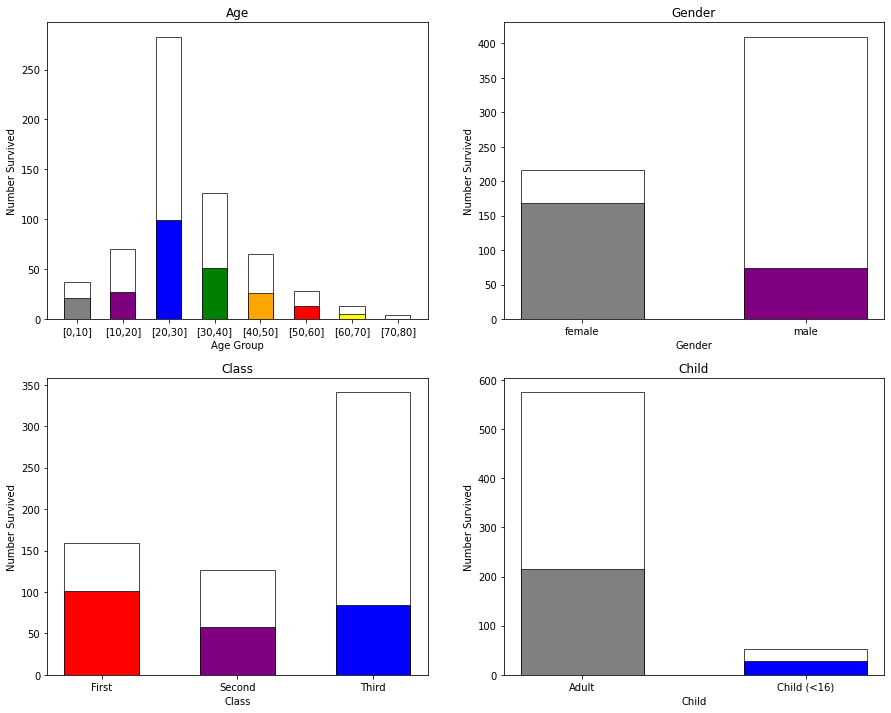

In [ ]:
# plot Survived per age group
def age_band(num):
    for i in range(1, 9):
        if num < 10*i :  return f'[{(i-1) * 10},{i*10}]'

dftrain['age_band'] = dftrain['age'].apply(age_band)
titanic_age = dftrain[['age_band', 'survived']].groupby('age_band')['survived'].value_counts().sort_index().unstack().fillna(0)
titanic_age['Survival_yes'] = titanic_age[1]
titanic_age['Survival_all'] = titanic_age[0]+titanic_age[1]

fig, ax = plt.subplots(2, 2, figsize=(15, 12))

color_map = ['Grey', 'Purple', 'Blue', 'Green', 'Orange', 'Red',
                      'Yellow', 'Pink',]

ax[0, 0].bar(titanic_age['Survival_all'].index, titanic_age['Survival_all'], 
       color='white', width=0.55, 
       edgecolor='black', 
       linewidth=0.7)

ax[0, 0].bar(titanic_age['Survival_yes'].index, titanic_age['Survival_yes'], 
       color=color_map, width=0.55, 
       edgecolor='black', 
       linewidth=0.7)
ax[0, 0].set_xlabel('Age Group')
ax[0, 0].set_ylabel('Number Survived')
ax[0, 0].set_title('Age')


# plot Survived per gender 

titanic_gender = dftrain[['sex', 'survived']].groupby('sex')['survived'].value_counts().sort_index().unstack().fillna(0)
titanic_gender['Survival_yes'] = titanic_gender[1]
titanic_gender['Survival_all'] = titanic_gender[0]+titanic_gender[1]

color_map = ['Grey', 'Purple']

ax[0, 1].bar(titanic_gender['Survival_all'].index, titanic_gender['Survival_all'], 
       color='white', width=0.55, 
       edgecolor='black', 
       linewidth=0.7)

ax[0, 1].bar(titanic_gender['Survival_yes'].index, titanic_gender['Survival_yes'], 
       color=color_map, width=0.55, 
       edgecolor='black', 
       linewidth=0.7)
ax[0, 1].set_xlabel('Gender')
ax[0, 1].set_ylabel('Number Survived')
ax[0, 1].set_title('Gender')


# plot Survived per passager class

titanic_class = dftrain[['class', 'survived']].groupby('class')['survived'].value_counts().sort_index().unstack().fillna(0)
titanic_class['Survival_yes'] = titanic_class[1]
titanic_class['Survival_all'] = titanic_class[0]+titanic_class[1]

color_map = ['Red', 'Purple','Blue']

ax[1, 0].bar(titanic_class['Survival_all'].index, titanic_class['Survival_all'], 
       color='white', width=0.55, 
       edgecolor='black', 
       linewidth=0.7)

ax[1, 0].bar(titanic_class['Survival_yes'].index, titanic_class['Survival_yes'], 
       color=color_map, width=0.55, 
       edgecolor='black', 
       linewidth=0.7)
ax[1, 0].set_xlabel('Class')
ax[1, 0].set_ylabel('Number Survived')
ax[1, 0].set_title('Class')


# plot Survived x if it's a child 

def child_band(num):
    for i in range(1, 9):
        if num < 16 :  return f'Child (<16)'
        else: return f'Adult'

dftrain['child_band'] = dftrain['age'].apply(child_band)
titanic_child = dftrain[['child_band', 'survived']].groupby('child_band')['survived'].value_counts().sort_index().unstack().fillna(0)
titanic_child['Survival_yes'] = titanic_child[1]
titanic_child['Survival_all'] = titanic_child[0]+titanic_child[1]

color_map = ['Grey','Blue']

ax[1, 1].bar(titanic_child['Survival_all'].index, titanic_child['Survival_all'], 
       color='white', width=0.55, 
       edgecolor='black', 
       linewidth=0.7)

ax[1, 1].bar(titanic_child['Survival_yes'].index, titanic_child['Survival_yes'], 
       color=color_map, width=0.55, 
       edgecolor='black', 
       linewidth=0.7)
ax[1, 1].set_xlabel('Child')
ax[1, 1].set_ylabel('Number Survived')
ax[1, 1].set_title('Child')
plt.show()

plot_vr1= dftrain.pop('age_band' ) 
plot_vr1= dftrain.pop('child_band' ) 

Text(0.5, 1.0, 'Survival Rate by Passenger Class and Gender')

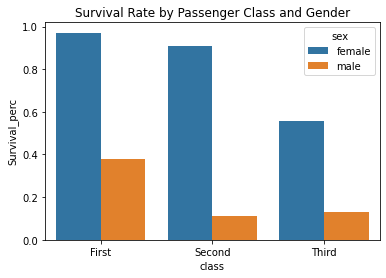

In [ ]:
tt_data = dftrain[['class','sex','survived']].groupby(['class', 'sex']).agg(Survival_perc=("survived", 'mean'))
tt_data = tt_data.reset_index()
  
sb.barplot(x="class",
           y="Survival_perc",
           hue="sex",
           data=tt_data).set_title("Survival Rate by Passenger Class and Gender")



# **Pré Processing Data**

In [ ]:
#getting the thuth value
y_train = dftrain.pop('survived') 
y_eval = dfeval.pop('survived')

#Generating the Features 

CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

def make_input_fn(data_df, label_df, num_epochs, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

# **Linear Regression Estimator**

In [ ]:
#defining the Linear Estimator

linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns) #getting the Linear Estimator
losses = []
accuracy = []

#trainning and evaluating the estimator
for epcs in range(1,10):
  train_input_fn = make_input_fn(dftrain, y_train,epcs)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
  eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False) # get model metrics/stats by testing on testing data

  linear_est.train(train_input_fn)  # train
  result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data
  accuracy.append(result['accuracy'])
  losses.append(result['loss'])
  loss=result['loss']
  acc=result['accuracy']
  print(f'epoch: {epcs} accuracy: {acc:10.6f} loss: {loss:10.6f}')


epoch: 1 accuracy:   0.685606 loss:   0.628890
epoch: 2 accuracy:   0.742424 loss:   0.477168
epoch: 3 accuracy:   0.734848 loss:   0.479982
epoch: 4 accuracy:   0.734848 loss:   0.560959
epoch: 5 accuracy:   0.765152 loss:   0.461245
epoch: 6 accuracy:   0.761364 loss:   0.459524
epoch: 7 accuracy:   0.768939 loss:   0.458332
epoch: 8 accuracy:   0.768939 loss:   0.460098
epoch: 9 accuracy:   0.776515 loss:   0.456676


# **Predicting Results:**

In [ ]:
#Predicting: result example
result=list(linear_est.predict(eval_input_fn))
print(dfeval.loc[1])
print(y_eval.loc[1])
print(result[1]['probabilities'][1])

sex                          male
age                          54.0
n_siblings_spouses              0
parch                           0
fare                      51.8625
class                       First
deck                            E
embark_town           Southampton
alone                           y
Name: 1, dtype: object
0
0.45169288


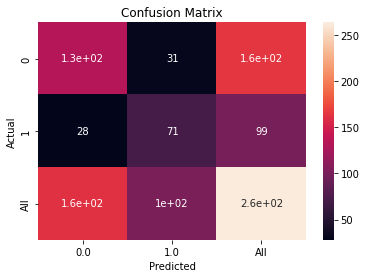

In [ ]:
#Getting the confusion_matrix  
ypred=np.zeros((len(result)))
for x in range(1,len(result)):
  if(result[x]['probabilities'][1]>0.5):
    ypred[x]=1
  else:
    ypred[x]=0

confusion_matrix = pd.crosstab(y_eval, ypred, rownames=['Actual'], colnames=['Predicted'], margins = True)
sb.heatmap(confusion_matrix, annot=True).set_title('Confusion Matrix')
plt.show()
